In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.patches as patches

In [2]:
def generate_lattice(v1=np.array([1, 0]), beta=60, rad=4):
    cos_beta = np.cos(np.radians(beta))
    sin_beta = np.sin(np.radians(beta))
    lattice_vec_length = np.linalg.norm(v1)
    
    v2 = np.array([cos_beta* v1[0] - sin_beta * v1[1], sin_beta * v1[0] + cos_beta * v1[1]])
    
    dis = int(rad / (sin_beta * lattice_vec_length)) + 1
    
    points = []
    
    for i in range(-dis, dis):
        for j in range(-dis, dis):
            p = i * v1 + j * v2
            if np.linalg.norm(p) < rad + 1e-6:
                points.append(p)
    
    return np.array(points)

In [ ]:
import math

def compute_value(theta, alpha):
    a = math.tan(math.radians(alpha))
    return a / (math.sin(math.radians(theta)) - a * math.cos(math.radians(theta)))

compute_value(30, 60)

In [ ]:
def draw_radial_line(angle, radius=rad):
    x = radius * np.cos(np.radians(angle))
    y = radius * np.sin(np.radians(angle))
    plt.plot([0, x], [0, y], '--', linewidth=0.1, color='black')
    plt.plot([0, -x], [0, -y], '--', linewidth=0.1, color='black')


v1 = np.array([10, 0])
rad = 500
points1 = generate_lattice(v1, beta=30, rad=rad)
points2 = generate_lattice(v1, beta=60, rad=rad)

plt.scatter(points1[:, 0], points1[:, 1], s=0.0001)
plt.scatter(points2[:, 0], points2[:, 1], s=0.0001)

draw_radial_line(0, radius=rad*1.2)
draw_radial_line(90, radius=rad*1.2)

# # 20
# draw_radial_line(20, radius=rad*1.2)
# draw_radial_line(40, radius=rad*1.2)
# draw_radial_line(60, radius=rad*1.2)
# draw_radial_line(80, radius=rad*1.2)
# draw_radial_line(100, radius=rad*1.2)
# draw_radial_line(120, radius=rad*1.2)
# draw_radial_line(140, radius=rad*1.2)
# draw_radial_line(160, radius=rad*1.2)

# 30
draw_radial_line(30, radius=rad*1.2)
draw_radial_line(60, radius=rad*1.2)
draw_radial_line(120, radius=rad*1.2)
draw_radial_line(150, radius=rad*1.2)

# # 45
# draw_radial_line(45, radius=rad*1.2)
# draw_radial_line(90, radius=rad*1.2)
# draw_radial_line(135, radius=rad*1.2)

# 60
draw_radial_line(60, radius=rad*1.2)
draw_radial_line(120, radius=rad*1.2)

# make the x and y axes equal
plt.axis('equal')
plt.savefig('lattice.pdf', bbox_inches='tight')

In [52]:
# 2* sin inverse 0.25
spl = 2 * np.degrees(np.arcsin(0.5/2))
spl = 35

Text(0, 0.5, 'Distance from origin')

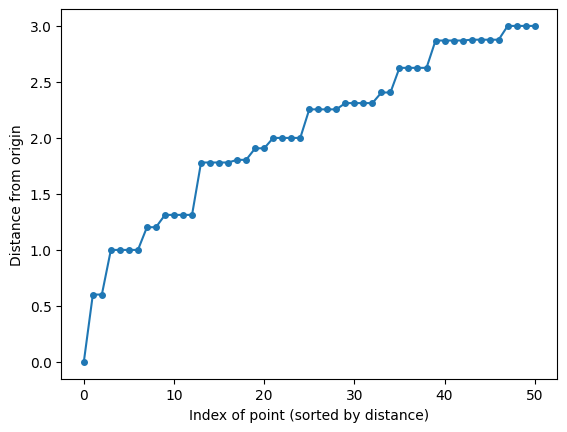

In [53]:
v1 = np.array([1, 0])
rad=3
points = generate_lattice(v1, beta=spl, rad=rad)

# sort the points by distance from the origin, also find the distances before sorting
distances = np.linalg.norm(points, axis=1)
sorted_indices = np.argsort(distances)
points = points[sorted_indices]
distances = distances[sorted_indices]

plt.plot(distances, 'o-', markersize=4)
plt.xlabel('Index of point (sorted by distance)')
plt.ylabel('Distance from origin')

# plt.savefig('points_per_radius.svg', bbox_inches='tight')

Text(0, 0.5, 'Y position')

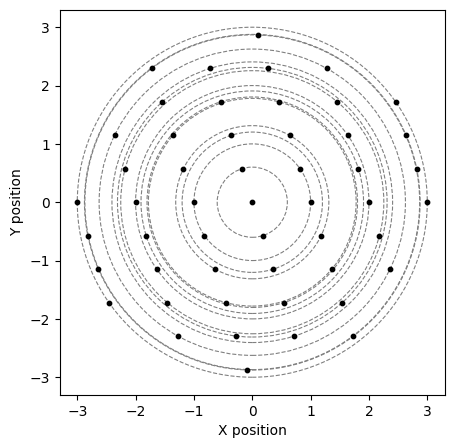

In [55]:
done_radii = 0
fig, ax = plt.subplots(figsize=(6, 5))

for point, distance in zip(points, distances):
    if not done_radii - 1e-6 < distance < done_radii + 1e-6:
        circle = patches.Circle((0, 0), distance, fill=False, linestyle='--', color='gray', linewidth=0.8)
        ax.add_patch(circle)
        done_radii = distance
    if done_radii > 3:
        break

# Optionally: scatter the points for context
ax.scatter(*zip(*points), s=10, color='black')

# Set aspect and limits
ax.set_aspect('equal')
plt.xlabel('X position')
plt.ylabel('Y position')
# plt.savefig('concentric_shells.svg', bbox_inches='tight')

In [50]:
np.sin(np.deg2rad(spl/2))

np.float64(0.25)